In [135]:
# Functions - Although optional, from now on we will use Type Annotations

# Argument 'x' is of type int and function 'double' returns type int
def double(x: int) -> int: 
    return x * 2

my_x = double(2)
print(my_x, '\n')

# Functions can have functions as arguments however,
# it needs to be of type Callable
from typing import Callable

def apply_to_one(f: Callable) -> int:
    return f(1)

x = apply_to_one(double)
y = apply_to_one(lambda x: x + 4)
print(x)
print(y, '\n')

# Arguments can have default values and are therefore optional. They can 
# also be positinal or keyword arguments. NOTE: Keyward args must follow 
# positional args. Functions can have multiple return statements

# 'x' is of type int or float, function 'my_function' returns a float
def my_function(x: (int, float), y: int, z: float = 1.5) -> float:
    if z > 1:
        return z * (x + y)
    else:
        return z / (x + y)
    
print(my_function(5, 6, z = 0.7)) # use z as a keyword argument
print(my_function(3.14, 7, 3.5))  # z is now a positional argument
print(my_function(10, 20), '\n')        # z is optional and 1.5 is default

# Useful for printing strings
def full_name(first = "What's-his-name", last = "Something"):
    return first + " " + last

print(full_name("Jim", "Holden"))
print(full_name("Jim"))
print(full_name(last="Holden"))

# Use triple quotes(""" """) to create Docstrings that can be retrieved by 
# python tools and IDEs. You can also use '?' in ipython and notebooks. 
def anotherdouble(x: int) -> int:
    """ 
    This is where you put an optional docstring that explains what the
    function does. For example this function multiplies it input by 2
    """
    return x * 2

4 

2
5 

0.06363636363636363
35.49
45.0 

Jim Holden
Jim Something
What's-his-name Holden


In [2]:
# Namespaces (i.e. global and local scopes)
try:   # if variable 'a' already exists in the namespace then delete 
    del a
except:
    pass

def func() -> None:  # variable 'a' is of local scope
    a = []
    for i in range(5):
        a.append(i)

try:
    print(a)
except NameError:
    print(r"'a' is not defined since it is a local variable to 'func'")

a = []   # variable 'a' is of global scope
def func() -> None:
    for i in range(5):
        a.append(i)
func()
print(a)
func()
print(a)

# You can make a function's variable visible using the global keyword
# This is generally considered bad form and you should use a class instead
del a

def bind_a_variable() -> None:
    global a
    a = []
bind_a_variable()
print(a)

'a' is not defined since it is a local variable to 'func'
[0, 1, 2, 3, 4]
[0, 1, 2, 3, 4, 0, 1, 2, 3, 4]
[]


In [4]:
# return multiple values from a function
# Note: returns an object of type Tuple

def sum_and_product(x: int, y: int) -> tuple:
    return (x + y), (x * y)

sp = sum_and_product(2, 3)
print(sp)

s, p = sum_and_product(5, 10)
print(s, p, '\n')

# we can assign multiple variables from values returned from the function
def f() -> tuple:
    a = 5
    b = 6
    c = 7
    return a, b, c

a = f() 
print(type(a))  # a is a tuple
print(a)
b, c, d = f()   # automatic unpacking: b, c, d are ints
print(b, c, d, '\n')

# We can also return multiple values using a dict
def f() -> dict:
    a = 5
    b = 6
    c = 7
    return{'a': a, 'b': b, 'c': c}

a = f()
print(type(a))
print(a)

(5, 6)
15 50 

<class 'tuple'>
(5, 6, 7)
5 6 7 

<class 'dict'>
{'a': 5, 'b': 6, 'c': 7}


In [18]:
# Regular Expression - module - A way of searching text
# Official documentation: https://docs.python.org/3/library/re.html
# A few examples of how to use since regular expressions are commonly used 
import re
# all examples below return True. Note: not negates an expression
print(not re.match("a", "cat"))  # 'cat' doesn't start with 'a'
print(re.search("a", "cat"))     # 'cat' has an 'a' in it
print(not re.search("c", "dog")) # 'dog' doesn't have a 'c' in it
print(3 == len(re.split("[ab]", "carbs"))) # split on a or c to ['c', 'r', 's']
print("R-D-" == re.sub("[0-9]", "-", "R2D2")) # replace digits with dashes

True
<re.Match object; span=(1, 2), match='a'>
True
True
True


In [134]:
# Functions are Objects
# Use a function to clean (pre-process) a dataset
states = ['   Alabama ', 'Georgia!', 'Georgia', 'georgia', 'FlOrIda',
          'south   carolina##', 'West virginia?']

def clean_strings(strings: str) -> list:
    result = []
    for value in strings:
        value = value.strip()
        value = re.sub('[!#?]', '', value)
        value = value.title()
        result.append(value)
    return result

my_states = clean_strings(states)
print(type(my_states))
print(my_states)

def remove_punctuation(value: str) -> str:
    return re.sub('[!#?]', '', value)

# operations performed above
clean_ops = [str.strip, remove_punctuation, str.title]

def clean_strings(strings: list, ops) -> list:
    result = []
    for value in strings:
        for function in ops:
            value = function(value)
        result.append(value)
    return result

print(clean_strings(states, clean_ops), '\n')

# While you might be tempted use maps, use comprehensions instead
rp = [remove_punctuation(x).strip().title() for x in states]
print(rp)

# or without remove_punctuation function:
rp = [re.sub('[!#?]', '', x).strip().title() for x in states]
print(rp)

# Not recommended to use maps. use comprehensions instead
#for x in map(remove_punctuation, states):  # don't do this
#    print(x)    

<class 'list'>
['Alabama', 'Georgia', 'Georgia', 'Georgia', 'Florida', 'South   Carolina', 'West Virginia']
['Alabama', 'Georgia', 'Georgia', 'Georgia', 'Florida', 'South   Carolina', 'West Virginia'] 

['Alabama', 'Georgia', 'Georgia', 'Georgia', 'Florida', 'South   Carolina', 'West Virginia']
['Alabama', 'Georgia', 'Georgia', 'Georgia', 'Florida', 'South   Carolina', 'West Virginia']


In [133]:
# research Jupyter Notebook notification:
# "'_xsrf argument missing from POST"

In [136]:
# Anonymous (Lambda) Functions - single statement functions
# Note: lambda functions do not need to be defined as a 
# dundar method (i.e. __name__) to be anonymous

def short_function(x: int) -> int:  # Standard functionn definition
    return x * 2

# Equivalent lambda function. Note: if assigning to a variable, it is
# better to use the traditional function and not the lambda
result = lambda x: x * 2  # don't do this

# Use Lambda function to pass a function as an argument
ints = [4, 0, 1, 5, 6]

def apply_to_list(some_list: list, f: callable):
    return [f(x) for x in some_list] # passing a function as an argument

result = apply_to_list(ints, lambda x: x * 2)
print(result)       # don't do this use a comprehension instead

my_result = [x * 2 for x in ints] # Same result using a comprehension
print(my_result, '\n')

# Sort a group of strings by the number of unique letters in each string
strings = ['foo', 'card', 'bar', 'aaaa', 'abab']
# pass lambda function to strings.sort() method
strings.sort(key=lambda x: len(set(list(x)))) 
print(strings, '\n')

# Currying-Partial Argument Application (derive new function from existing)

# simple function to add two numbers
def add_numbers(x: int, y: int) -> int:
    return x + y

# Use lambda function to create a new function that adds 5 to its argument
add_five = lambda y: add_numbers(5, y) # 'y' is curried
print(add_five(10))

# Not recommended to use 'partial' function from 'functools' module
from functools import partial
add_another_five = partial(add_numbers, 5)
print(add_another_five(10))

[8, 0, 2, 10, 12]
[8, 0, 2, 10, 12] 

['aaaa', 'foo', 'abab', 'bar', 'card'] 

15
15


In [ ]:
# replace partial with a generator expression or comprehension

In [74]:
# Classes - definition
class CountingClicker:
    """A class can/should have a docstring, just like a function"""
    # __init__ is a 'dunder' method constructor and is considered private
    # 'self' refers to a particular instance of a class
    def __init__(self, count = 0):
        self.count = count
        
    def __repr__(self):
        return f"CountingClicker(count={self.count})"
    
    # define public API functions
    def click(self, num_times = 1):
        """Click the clicker some number of times"""
        self.count += num_times
        
    def read(self):
        return self.count
    
    def reset(self):
        self.count = 0
        
clicker1 = CountingClicker()           # Clicker1 is initialized to 0
clicker2 = CountingClicker(100)        # Clicker2 starts with count = 100
clicker3 = CountingClicker(count=1000) # initialized using keyward argument
print(repr(clicker1), '\n')   # calls __repr__ function

# let's use the class
clicker = CountingClicker()           # Starts at 0
print(clicker.read())                 # 0
clicker.click()                       # increment num_times
clicker.click()                       # increment num_times
print(clicker.read())                 # 2 - after 2 clicks
clicker.reset()                       # resets num_times back to 0
print(clicker.read())                 # 0
print()

# Inheritance, subclasses and overiding
# create a subclass of an existing class

# CountingClicker is the parent or base class
class NoResetClicker(CountingClicker): 
    # overide the reset method so that it cannot be reset
    def reset(self):
        pass         # Remember 'pass' is python's no operation method
    
clicker2 = NoResetClicker()           # Starts at 0
print(clicker2.read())                # 0
clicker2.click()                      # increment num_times
clicker2.click()                      # increment num_times
print(clicker2.read())                # 2 - after 2 clicks
clicker2.reset()                      # resets num_times but no action
print(clicker2.read())                # 2

CountingClicker(count=0) 

0
2
0

0
2
2


In [89]:
# args and kwargs
# This is less readable and should be used when there is no other option
# A function that returns a new function returning twice the value of f
def doubler(f):
    def g(x):
        return 2 * f(x)
    return g

def f1(x):
    return x + 1

g = doubler(f1)  # works for single argument functions
print(g(3))       # 8
print(g(-1))      # 0

def f2(x, y):
    return x + y

g = doubler(f2)
# Soesn't work if with more than one argument so we'll catch the exception
try:
    print(g(1, 2))
except TypeError:
    print("g() only takes one argument")
print()
    
# Solve this problem using argument unpacking. 
# Where you  don't specify how many argument in the function definition
def magic(*args, **kwargs):
    print("unnamed args: ", args)   # args = tuple of unnamed arguments
    print("keyward args: ", kwargs) # kwargs = dict of named arguments

print(magic(1, 2, key="word", key2="word2"), '\n')

# Works to unpack tuples and dicts to supply arguments to a function
def other_way_magic(x, y, z):
    return x + y + z

x_y_list = [1, 2]  # list
z_dict = {"z": 3}  # dict
print(other_way_magic(*x_y_list, **z_dict)) # unpack x_y_list and z_dict

# Failing example from above works now when using args and kwargs
def doubler_correct(f):
    """Works no matter what kind of input f expects"""
    def g(*args, **kwargs):
        """Whatever arguments g is supplied, pass them through to f"""
        return 2 * f(*args, **kwargs)
    return g

g = doubler_correct(f2)
print(g(1, 2))

8
0
g() only takes one argument

unnamed args:  (1, 2)
keyward args:  {'key': 'word', 'key2': 'word2'}
None 

6
6


In [73]:
# what is the type when a function returns a function?
# research partial, map, reduce and filter

In [92]:
# files 
# open and close files: open(path) defaults to open(path, 'r'). 
# Be careful with open(path, 'w') since it will overwrite an existing file
# use open(path, 'x') instead since this fails if a file already exists

path = 'examples/segismundo.txt'
f = open(path)
for line in f:  # iterate through file
    print(line.rstrip()) # strip out EOLs to make more readable
    pass
f.close()      # close file to release resources

lines = [x.rstrip() for x in open(path)] # done as a comprehension
print(lines, '\n')

# use 'with' to automatically close open files when done
with open(path) as f:
    lines = [x.rstrip() for x in f]
print(lines)

SueÃ±a el rico en su riqueza,
que mÃ¡s cuidados le ofrece;

sueÃ±a el pobre que padece
su miseria y su pobreza;

sueÃ±a el que a medrar empieza,
sueÃ±a el que afana y pretende,
sueÃ±a el que agravia y ofende,

y en el mundo, en conclusiÃ³n,
todos sueÃ±an lo que son,
aunque ninguno lo entiende.

['SueÃ±a el rico en su riqueza,', 'que mÃ¡s cuidados le ofrece;', '', 'sueÃ±a el pobre que padece', 'su miseria y su pobreza;', '', 'sueÃ±a el que a medrar empieza,', 'sueÃ±a el que afana y pretende,', 'sueÃ±a el que agravia y ofende,', '', 'y en el mundo, en conclusiÃ³n,', 'todos sueÃ±an lo que son,', 'aunque ninguno lo entiende.', ''] 

['SueÃ±a el rico en su riqueza,', 'que mÃ¡s cuidados le ofrece;', '', 'sueÃ±a el pobre que padece', 'su miseria y su pobreza;', '', 'sueÃ±a el que a medrar empieza,', 'sueÃ±a el que afana y pretende,', 'sueÃ±a el que agravia y ofende,', '', 'y en el mundo, en conclusiÃ³n,', 'todos sueÃ±an lo que son,', 'aunque ninguno lo entiende.', '']


Common file modes
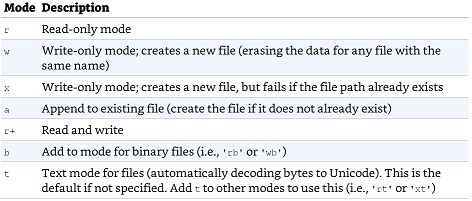

In [93]:
# other file operations
f = open(path)         # open(path, 'r'), open for reading
print(f.read(10), '\n')  # first 10 characters

f2 = open(path, 'rb')  # Open for reading in binary mode
print(f2.read(10))

print(f.tell())        # file handle position - 10 since we read 10 bytes
print(f2.tell())       # any difference between f & f2 is due to encoding
print()

# use sys (system) module to query file encoding
import sys
print(sys.getdefaultencoding()) # default OS encoding for files

print(f.seek(3))       # change file handle position from begining of file
print(f.read(1))       # print first character from new position

f.close()              # remember to close the files
f2.close()

SueÃ±a el  

b'Sue\xc3\xb1a el '
10
10

utf-8
3
Ã


In [94]:
# Write to a file - use file.wrie or file.writelines
with open('tmp.txt', 'w') as handle:
    handle.writelines(x for x in open(path) if len(x) > 1)

with open('tmp.txt') as f:
    lines = f.readlines()
    
print(lines)

['SueÃ±a el rico en su riqueza,\n', 'que mÃ¡s cuidados le ofrece;\n', 'sueÃ±a el pobre que padece\n', 'su miseria y su pobreza;\n', 'sueÃ±a el que a medrar empieza,\n', 'sueÃ±a el que afana y pretende,\n', 'sueÃ±a el que agravia y ofende,\n', 'y en el mundo, en conclusiÃ³n,\n', 'todos sueÃ±an lo que son,\n', 'aunque ninguno lo entiende.\n']


Common file nethods
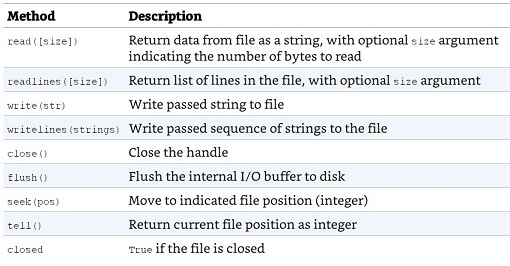

In [95]:
# Bytes and Unicode
with open(path) as f:
    chars = f.read(10)  # read 10 characters using default encoding
print(chars)

with open(path, 'rb') as f: # read 10 characters as binary
    data = f.read(10)    
print(data, '\n')

print(data.decode('utf8'))  # decode binary characters to unicode

# Fails since this character is encoded in two bytes across a boundary
# we'll catch the exception
try:
    print(data[:4].decode('utf8'))
except UnicodeDecodeError: 
    print("Needs two characters to fully decode", '\n')

# use text mode to convert from one Unicode encoding to another
sink_path = 'sink.txt'
with open(path) as source:
    with open(sink_path, 'wt', encoding='iso-8859-1') as sink: #use text mode
        sink.write(source.read())
        
with open(sink_path, encoding='iso-8859-1') as f:
    print(f.read(10))

SueÃ±a el 
b'Sue\xc3\xb1a el ' 

Sueña el 
Needs two characters to fully decode 

SueÃ±a el 


In [96]:
# careful using seek since if the file position falls in the middle of a 
# Unicode muli-byte defined encoding, reads will fail

f = open(path)
print(f.read(5))

print(f.seek(4))

# Can Fail if this character is encoded in two bytes across a boundary
# we'll catch the exception
try:
    print(f.read(1))
except UnicodeDecodeError: 
    print("Needs two characters to fully decode", '\n')
f.close()

SueÃ±
4
±
